Modified version of a notebook provided by Kate Storey-Fisher

In [1]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [3]:
cmap_map = 'plasma'

## Data access

The files are accessible on Zenodo at https://doi.org/10.5281/zenodo.10403370 (this notebook shows version 1.0.0).
    
The file names are:
- quaia_G\<Glim\>\<tag\>.fits
- random_G\<Glim\>_10x\<tag\>.fits
- selection_function_NSIDE64_G\<Glim\>\<tag\>.fits

where \<Glim\> is either 20.0 or 20.5, and \<tag\> is an empty string for the full catalogs.

More details are available in the Zenodo descriptions linked above, and in the Quaia publication: https://arxiv.org/abs/2306.17749.

We also show here the G<20.5 catalog split into two redshift bins and the associated selection functions, as used in the CMB lensing tomography analysis of Quaia: https://arxiv.org/abs/2306.17748. These are updated versions of the selection functions available at https://zenodo.org/records/8098636. The file names of the selection functions are the same as above, with \<tag\> replaced by 'zsplit2bin0' or 'zsplit2bin1' for the low-$z$ and high-$z$ split samples. The 'zsplit' catalogs loaded in below can be recreated by simply dividing the G<20.5 catalog into two redshift bins at the median redshift.

## Load data from local machine

In [7]:
fdir = '../../data/quaia/'
fn_gcatlo = fdir + f'quaia_G20.0.fits'
fn_gcathi = fdir + f'quaia_G20.5.fits'

fn_sello = fdir + f"selection_function_NSIDE64_G20.0.fits"
fn_selhi = fdir + f"selection_function_NSIDE64_G20.5.fits"

fn_randlo = fdir + f'random_G20.0_10x.fits'
fn_randhi = fdir + f'random_G20.5_10x.fits'

In [8]:
fn_gcatlo 

'../../data/quaia/quaia_G20.0.fits'

In [9]:
fn_gcathi_zbin0 = fdir + f'quaia_G20.5_zsplit2bin0.fits'
fn_gcathi_zbin1 = fdir + f'quaia_G20.5_zsplit2bin1.fits'

fn_selhi_zbin0 = fdir + f"selection_function_NSIDE64_G20.5_zsplit2bin0.fits"
fn_selhi_zbin1 = fdir + f"selection_function_NSIDE64_G20.5_zsplit2bin1.fits"

## Parameters

In [10]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [11]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

In [12]:
G_hi = 20.5
G_lo = 20.0

In [13]:
# for plotting purposes
fac_stdev = 1.5

## Quasar catalog

In [14]:
tab_gcatlo = Table.read(fn_gcatlo)
N_gcatlo = len(tab_gcatlo)
print(f"Number of data sources: {N_gcatlo}")

Number of data sources: 755850


In [15]:
print(tab_gcatlo.meta)

{'NAME': '\\emph{{Gaia}}--\\emph{{unWISE}} Quasar Catalog', 'ABBRV': 'Quaia'}


In [16]:
print(f"Column names: {tab_gcatlo.columns}")

Column names: <TableColumns names=('source_id','unwise_objid','redshift_quaia','redshift_quaia_err','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','mag_w1_vg','mag_w2_vg','pm','pmra','pmdec','pmra_error','pmdec_error')>


In [17]:
tab_gcathi = Table.read(fn_gcathi)
N_gcathi = len(tab_gcathi)
print(f"Number of data sources: {N_gcathi}")

Number of data sources: 1295502


### Make map of quasar number counts

In [18]:
pixel_indices_gcatlo = hp.ang2pix(NSIDE, tab_gcatlo['ra'], tab_gcatlo['dec'], lonlat=True)
map_gcatlo = np.bincount(pixel_indices_gcatlo, minlength=NPIX)

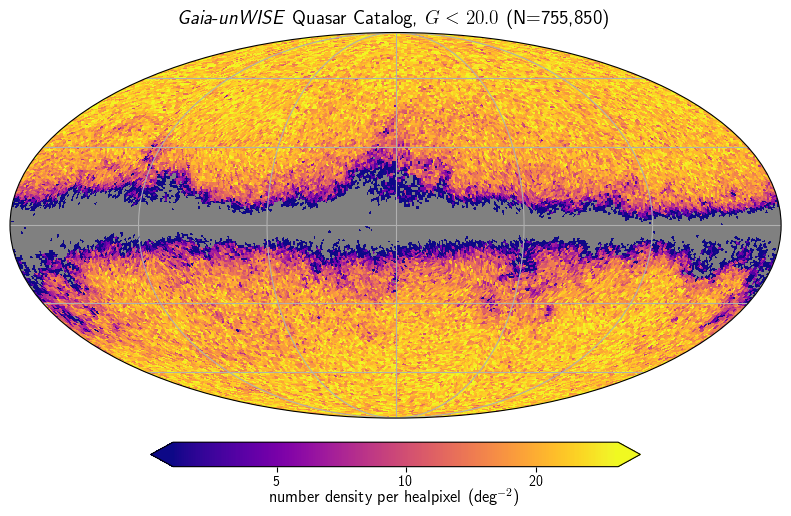

In [19]:
title_gcatlo = rf"{name_catalog}, $G<{G_lo}$ (N={len(tab_gcatlo):,})"
projview(map_gcatlo, title=title_gcatlo,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcatlo)-fac_stdev*np.std(map_gcatlo), max=np.median(map_gcatlo)+fac_stdev*np.std(map_gcatlo), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

In [20]:
pixel_indices_gcathi = hp.ang2pix(NSIDE, tab_gcathi['ra'], tab_gcathi['dec'], lonlat=True)
map_gcathi = np.bincount(pixel_indices_gcathi, minlength=NPIX)

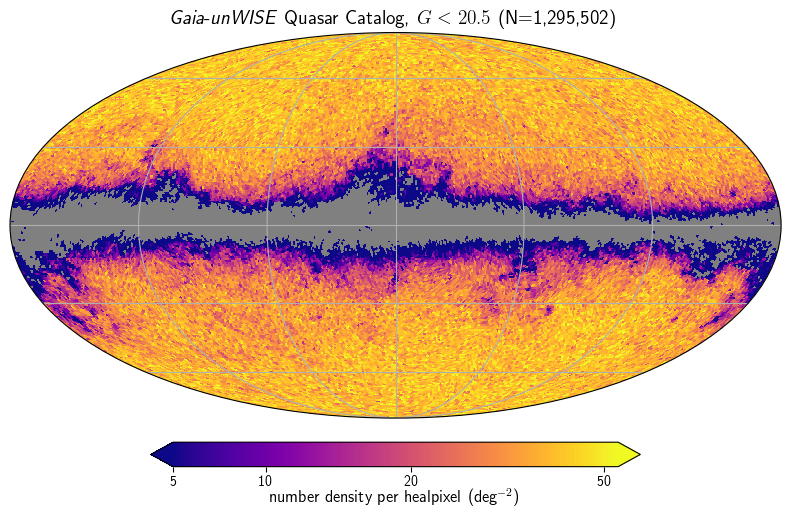

In [21]:
title_gcathi = rf"{name_catalog}, $G<{G_hi}$ (N={len(tab_gcathi):,})"
projview(map_gcathi, title=title_gcathi,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcathi)-fac_stdev*np.std(map_gcathi), max=np.median(map_gcathi)+fac_stdev*np.std(map_gcathi), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50]) 

## z-split catalogs

In [22]:
tab_gcathi_zbin0 = Table.read(fn_gcathi_zbin0)
N_gcathi_zbin0 = len(tab_gcathi_zbin0)
print(f"Number of data sources: {N_gcathi_zbin0}")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/quaia/quaia_G20.5_zsplit2bin0.fits'

In [19]:
pixel_indices_gcathi_zbin0 = hp.ang2pix(NSIDE, tab_gcathi_zbin0['ra'], tab_gcathi_zbin0['dec'], lonlat=True)
map_gcathi_zbin0 = np.bincount(pixel_indices_gcathi_zbin0, minlength=NPIX)

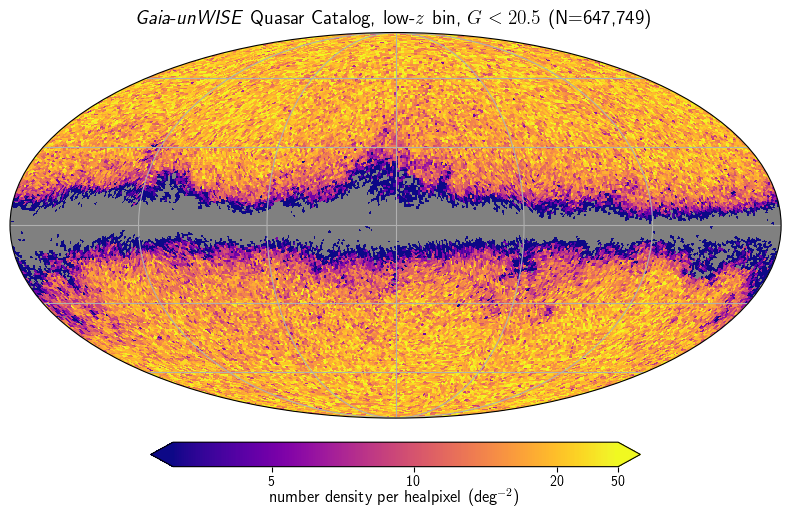

In [20]:
title_gcathi_zbin0 = rf"{name_catalog}, low-$z$ bin, $G<{G_hi}$ (N={len(tab_gcathi_zbin0):,})"
projview(map_gcathi_zbin0, title=title_gcathi_zbin0,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcathi_zbin0)-fac_stdev*np.std(map_gcathi_zbin0), 
             max=np.median(map_gcathi_zbin0)+fac_stdev*np.std(map_gcathi_zbin0), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50]) 

In [23]:
tab_gcathi_zbin1 = Table.read(fn_gcathi_zbin1)
N_gcathi_zbin1 = len(tab_gcathi_zbin1)
print(f"Number of data sources: {N_gcathi_zbin1}")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/quaia/quaia_G20.5_zsplit2bin1.fits'

In [24]:
pixel_indices_gcathi_zbin1 = hp.ang2pix(NSIDE, tab_gcathi_zbin1['ra'], tab_gcathi_zbin1['dec'], lonlat=True)
map_gcathi_zbin1 = np.bincount(pixel_indices_gcathi_zbin1, minlength=NPIX)

NameError: name 'tab_gcathi_zbin1' is not defined

In [25]:
title_gcathi_zbin1 = rf"{name_catalog}, high-$z$ bin, $G<{G_hi}$ (N={len(tab_gcathi_zbin1):,})"
projview(map_gcathi_zbin1, title=title_gcathi_zbin1,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcathi_zbin1)-fac_stdev*np.std(map_gcathi_zbin1), 
             max=np.median(map_gcathi_zbin1)+fac_stdev*np.std(map_gcathi_zbin1), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50]) 

NameError: name 'tab_gcathi_zbin1' is not defined

## Selection function models

In [26]:
map_sello = hp.read_map(fn_sello)
print(np.min(map_sello), np.max(map_sello))

0.0 0.7873269787302883


In [27]:
np.arange(0, max(map_sello), 0.25)

array([0.  , 0.25, 0.5 , 0.75])

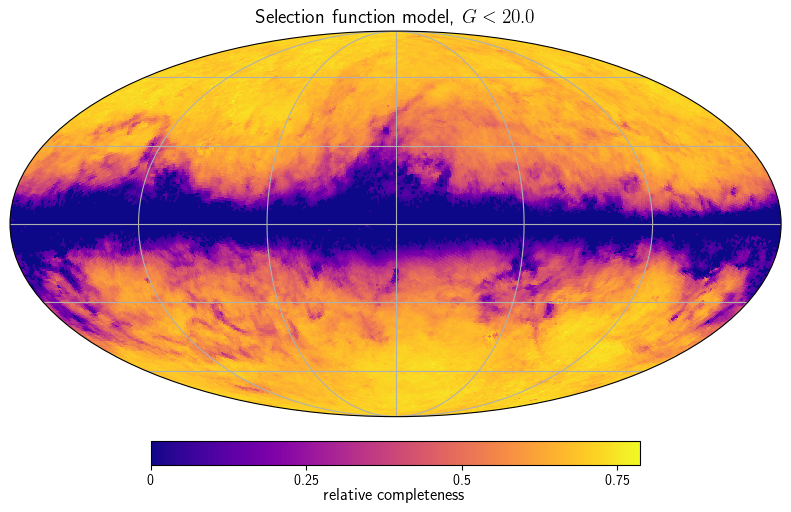

In [28]:
projview(map_sello, title=rf"Selection function model, $G<{G_lo}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_sello),
            cbar_ticks=np.arange(0, max(map_sello), 0.25)
            ) 

In [29]:
map_selhi = hp.read_map(fn_selhi)
print(np.min(map_selhi), np.max(map_selhi))

0.0 0.9613862831064095


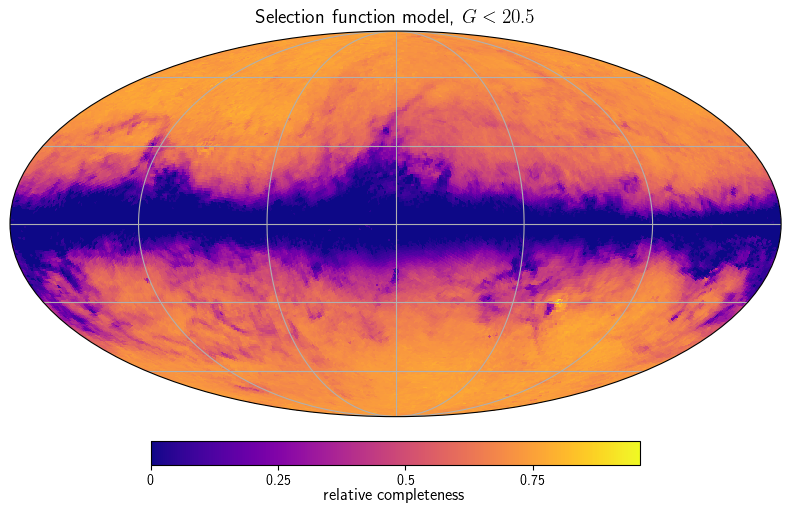

In [30]:
projview(map_selhi, title=rf"Selection function model, $G<{G_hi}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_selhi),
            cbar_ticks=np.arange(0, max(map_selhi), 0.25)
            ) 

In [31]:
map_selhi_zbin0 = hp.read_map(fn_selhi_zbin0)
print(np.min(map_selhi_zbin0), np.max(map_selhi_zbin0))

FileNotFoundError: [Errno 2] No such file or directory: '../../data/quaia/selection_function_NSIDE64_G20.5_zsplit2bin0.fits'

In [32]:
projview(map_selhi_zbin0, title=rf"Selection function model, low-$z$ bin, $G<{G_hi}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_selhi_zbin0),
            cbar_ticks=np.arange(0, max(map_selhi_zbin0), 0.25)
            ) 

NameError: name 'map_selhi_zbin0' is not defined

In [33]:
map_selhi_zbin1 = hp.read_map(fn_selhi_zbin1)
print(np.min(map_selhi_zbin1), np.max(map_selhi_zbin1))

FileNotFoundError: [Errno 2] No such file or directory: '../../data/quaia/selection_function_NSIDE64_G20.5_zsplit2bin1.fits'

In [34]:
projview(map_selhi_zbin1, title=rf"Selection function model, high-$z$ bin, $G<{G_hi}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_selhi_zbin1),
            cbar_ticks=np.arange(0, max(map_selhi_zbin1), 0.25)
            ) 

NameError: name 'map_selhi_zbin1' is not defined

## Random catalog

In [35]:
tab_randlo = Table.read(fn_randlo)
N_randlo = len(tab_randlo)
print(f"Number of random sources: {N_randlo}")

Number of random sources: 7563151


In [36]:
print(f"Column names: {tab_randlo.columns}")

Column names: <TableColumns names=('ra','dec','ebv')>


In [37]:
tab_randhi = Table.read(fn_randhi)
N_randhi = len(tab_randhi)
print(f"Number of random sources: {N_randhi}")

Number of random sources: 12955802


### Make maps of random number counts

In [38]:
pixel_indices_randlo = hp.ang2pix(NSIDE, tab_randlo['ra'], tab_randlo['dec'], lonlat=True)
map_randlo = np.bincount(pixel_indices_randlo, minlength=NPIX)

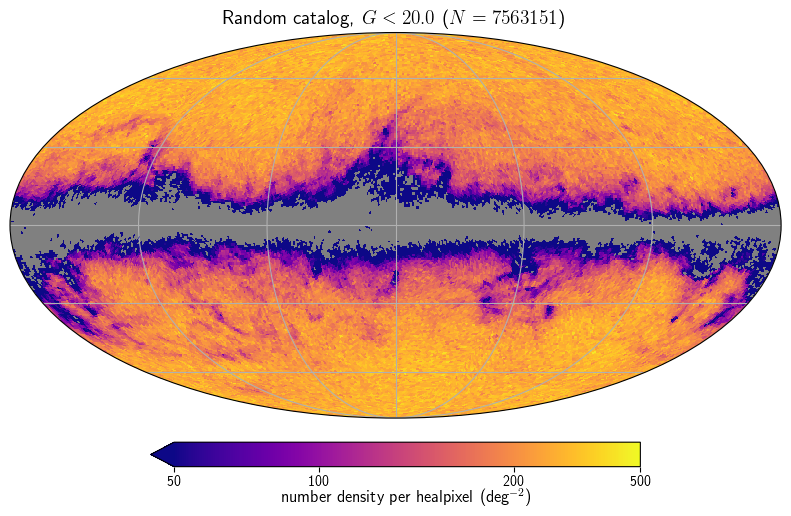

In [39]:
projview(map_randlo, title=rf"Random catalog, $G<{G_lo}$ ($N={N_randlo}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randlo)-fac_stdev*np.std(map_randlo), 
            max=np.median(map_randlo)+fac_stdev*np.std(map_randlo), 
            norm='log', graticule=True,
            cbar_ticks=[50, 100, 200, 500]) 

In [40]:
pixel_indices_randhi = hp.ang2pix(NSIDE, tab_randhi['ra'], tab_randhi['dec'], lonlat=True)
map_randhi = np.bincount(pixel_indices_randhi, minlength=NPIX)

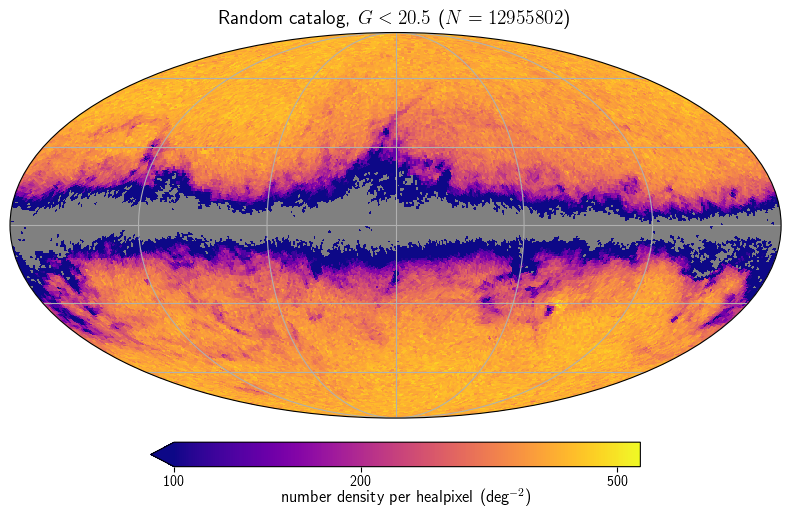

In [41]:
projview(map_randhi, title=rf"Random catalog, $G<{G_hi}$ ($N={N_randhi}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randhi)-fac_stdev*np.std(map_randhi), max=np.median(map_randhi)+fac_stdev*np.std(map_randhi), 
            norm='log', graticule=True,
            cbar_ticks=[100, 200, 500]) 

In [42]:
norm_factor = N_gcatlo/N_randlo
i_nonzero = np.abs(map_gcatlo)>1e-8
map_residuals_lo = np.full(len(map_randlo), np.nan)
map_residuals_lo[i_nonzero] = norm_factor*map_randlo[i_nonzero]/map_gcatlo[i_nonzero] - 1

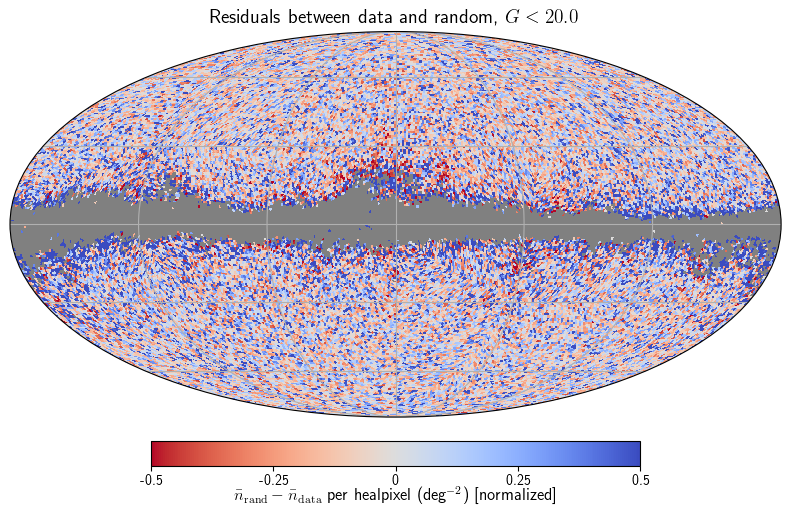

In [43]:
projview(map_residuals_lo, title=rf"Residuals between data and random, $G<{G_lo}$",
            unit=r"$\bar{n}_\mathrm{rand} - \bar{n}_\mathrm{data}$ per healpixel (deg$^{-2}$) [normalized]", 
            cmap='coolwarm_r', coord=['C', 'G'], 
            min=-0.5, max=0.5, graticule=True,
            cbar_ticks=[-0.5, -0.25, 0, 0.25, 0.5]) 

In [44]:
norm_factor = N_gcathi/N_randhi
i_nonzero = np.abs(map_gcathi)>1e-8
map_residuals_hi = np.full(len(map_randhi), np.nan)
map_residuals_hi[i_nonzero] = norm_factor*map_randhi[i_nonzero]/map_gcathi[i_nonzero] - 1

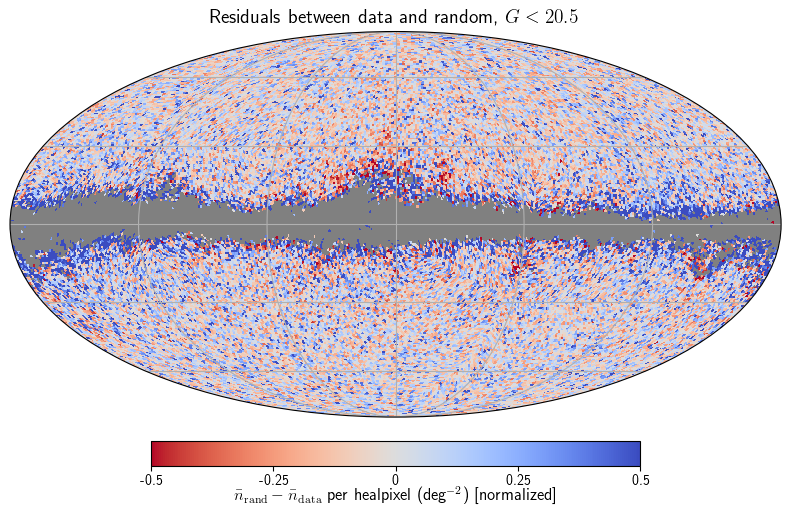

In [45]:
projview(map_residuals_hi, title=rf"Residuals between data and random, $G<{G_hi}$",
            unit=r"$\bar{n}_\mathrm{rand} - \bar{n}_\mathrm{data}$ per healpixel (deg$^{-2}$) [normalized]", 
            cmap='coolwarm_r', coord=['C', 'G'], 
            min=-0.5, max=0.5, graticule=True,
            cbar_ticks=[-0.5, -0.25, 0, 0.25, 0.5]) 